# Examen 1
## Física Computacional
### Hernández Ramos Sandra 
$Sandii\hbar ers^{\heartsuit}$ 🦆🌵🌹🥀🌿🍀🌺🌷



## Python 

In [9]:
# Líbrerías 
from pylab import * # se importa la libreria pylab
datos = loadtxt ('t_acel.dat')
t = datos [:,0]
a = datos[:,1] 
from scipy.integrate import * # se importa la libreria scipy.integrate
import random
from numpy import array
import math
%matplotlib inline
# %matplotlib inline despliegue gráfico de la librería matplotlib se haga dentro del mismo notebook 

***Resuelva los siguientes ejercicios, explicando claramente su razonamiento.****

<span style="color:blue">1. En clase vimos como en un arreglo puede representar la gráfica de una función $f(x)$ con los puntos ${x_{i},f_{i}}$ con $i=1,,2,3,...N$. También vimos como obtener las primeras derivadas numéricas en cada punto, $f'(x_{i})$ y $f''(x_{i})$, es decir, podemos obtener el conjunto de puntos $\{x_{i},f'_{i}\}$ y $\{x_{i},f''_{i}\}$. Este problema consiste en hacer lo mismo pero para el caso de la integral, y para ello realice una función que tenga como entrada los puntos $\{x_{i},f_{i}\}$ y que regrese $\{x_{i},F_{i}\}$, donde $F_{i}$ representa la integral de la función hasta el $x_{i}$-ésimo punto. Para corroborar que su función trabaja de manera adecuada, puede utilizar la función $cos(x)$ en el intervalo $[0,2\pi]$. Puede utilizar cualquier algoritmo de integración que vimos en clase o en las tareas</span>

Queremos una función que regrese todas las integrales hasta el punto x_{i} por ejemplo: si tenemos el punto cero en la integral cera cero, en el punto 1, será la diferencia sobre ancho como por geometría, para el punto 2 es cuando define como para la integral, entonces queremos una función que nos regrese justamente eel punto xi y la integral hasta el punto xi, es decir, queremos que nos regrese la integral en el punto cero, la integral en el punto 1, la integral en el punto 2, la integral en el punto 3... por eso pedimos que nos regrese todo un arreglo.

In [155]:
#Definimos una función que nos calcule la integral hasta el punto $x_{i}$
def newfuncion(x,f):
    #arreglo en el que pondrán los valores hasta el punto $x_{i}$
    F=np.zeros(len(f))
    #distancia entre los puntos
    h=x[1]-x[0]
    #Definimos la fronteras, es decir los primeros cuatro puntos 
    #para F[0]=0 porque es la integral sobre un punto.
    F[0]=0
    #Definimos la integral en los puntos 1,2 y 3 como el área de un rectángulo, es decir, base por altura.
    F[1]=(f[1]-f[0])*(x[1]-x[0])
    F[2]=(f[2]-f[1])*(x[2]-x[1])
    F[3]=(f[3]-f[2])*(x[3]-x[2])
    #Definimos una suma para las fronteras
    fronteras=F[0]+F[1]+F[2]+F[3]
    #Para los elementos siguientes podemos usar parte de el algortimo 2 que se encuentra en eL Notebook 6
    for i in range (4,len(f)):
        if mod((i),2) == 1:
            F[i]=0
            #Suma las partes de la integral a F[i]
            for j in range(1,i-1,2):
                F[i] += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                #En el caso de que nos quedé un elemento en la frontera, definimos a F[i] como:
        if mod((i),2) == 0:
                    #Usamos una variable auxiliar a la que le sumaremos las integrales
            p=0
            for j in range(2,i-1,2):
                        p += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                       #Por último definimos a F[i]como la suma de p + la integral en la frontera
                        F[i]=p+(h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])+fronteras
    return F

El error entre ambas derivadas es 0.18988756700713244


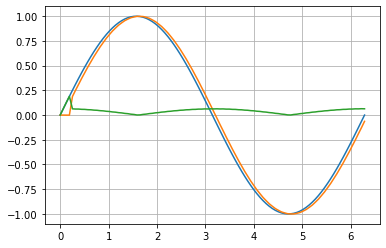

In [156]:
#Definimos nuestra malla
x = linspace(0,2*pi,100)
y_integral = np.sin(x)
y_integral_numerica = newfuncion(x,np.cos(x))
error=abs(y_integral- y_integral_numerica)
#Graficamos la integral del Coseno punto a punto, es decir el Seno evaluado en la malla
plot(x,y_integral)
#Graficamos la integral punto a punto del coseno con funcion1
plot(x,y_integral_numerica)
plot(x,error,label='Error entre ambas gráficas')
print("El error entre ambas derivadas es",max(error))
grid()
show()

El error entre ambas derivadas es 0.018867926747449908


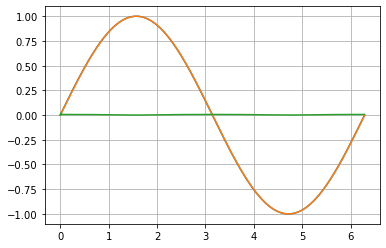

In [157]:
#Definimos nuestra malla
x=linspace(0,2*pi,1000)
y_integral = np.sin(x)
y_integral_numerica = newfuncion(x,np.cos(x))
error=abs(y_integral- y_integral_numerica)
#Graficamos la integral del Coseno punto a punto, es decir el Seno evaluado en la malla
plot(x,np.sin(x))
#Graficamos la integral punto a punto del coseno con funcion1
plot(x,funcion1(x,np.cos(x)))
#s=m[:,1]
#m=funcion1(x,np.cos(x))
#print('{:^20}{:^20}'.format(r'x_i','Integral en x_i'))
#for i in range (len(m)):
    #print('{:^20}{:^20}'.format(x[i],m[i]))
plot(x,error,label='Error entre ambas gráficas')
print("El error entre ambas derivadas es",max(error))
grid()
show()

In [143]:
#Definimos una función que nos calcule la integral hasta el punto $x_{i}$
def funcion1(x,f):
    #arreglo en el que pondrán los valores hasta el punto $x_{i}$
    F=np.zeros(len(f))
    #distancia entre los puntos
    h=x[1]-x[0]
    #Definimos la fronteras, es decir los primeros cuatro puntos 
    #para F[0]=0 porque es la integral sobre un punto.
    F[0]=0
    #Definimos la integral en los puntos 1,2 y 3 como el área de un rectángulo, es decir, base por altura. 
    F[1]=(f[1]-f[0])*h
    F[2]=(f[2]-f[1])*h+F[1]
    F[3]=(f[3]-f[2])*(h)+F[2]
    
    #Para los elementos siguientes podemos usar parte de el algortimo 2 que se encuentra en eL Notebook 6
    for i in range (4,len(f)):
            if mod((i),2) == 1:
                F[i]=0
                #Suma las partes de la integral a F[i]
                for j in range(1,i-1,2):
                    F[i] += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                #En el caso de que nos quedé un elemento en la frontera, definimos a F[i] como:
            if mod((i),2) == 0:
                #Usamos una variable auxiliar a la que le sumaremos las integrales
                p=0
                for j in range(2,i-1,2):
                    p += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                    #Por último definimos a F[i]como la suma de p + la integral en la frontera
                    F[i]=p+(h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])   
            
    return F

Probemos ahora nuestra integral con la función definida anteriormente. Para ello graficaremos la integral del cos(x) de 0 a $2\pi$, así como el sen(x) en el mismo intervalo.

El error entre ambas derivadas es 0.19039816702546633


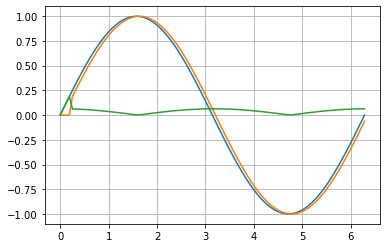

In [144]:
#Tenemos nuestra malla
x = linspace(0,2*pi,100) # linspace(inicio,final,numero de puntos)
y_integral = np.sin(x) #integral de cos(x) 
y_integral_numerica = funcion1(x,np.cos(x)) #integral numérica, es decir, la obtenida con el algoritmo 
error=abs(y_integral- y_integral_numerica)
#Graficamos 
plot(x,y_integral, label"Integral)
#Graficamos la integral punto a punto del coseno con funcion1
plot(x,y_integral_numerica)
plot(x,error,label='Error entre ambas gráficas')
print("El error entre ambas derivadas es",max(error))
grid()
show()

El error entre ambas derivadas es 0.018868424332598516


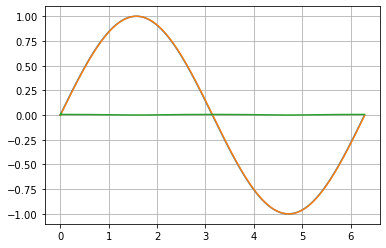

In [38]:
#Definimos nuestra malla
x=linspace(0,2*pi,1000)
y_integral = np.sin(x)
y_integral_numerica = funcion1(x,np.cos(x))
error=abs(y_integral- y_integral_numerica)
#Graficamos la integral del Coseno punto a punto, es decir el Seno evaluado en la malla
plot(x,np.sin(x))
#Graficamos la integral punto a punto del coseno con funcion1
plot(x,funcion1(x,np.cos(x)))
#s=m[:,1]
#m=funcion1(x,np.cos(x))
#print('{:^20}{:^20}'.format(r'x_i','Integral en x_i'))
#for i in range (len(m)):
    #print('{:^20}{:^20}'.format(x[i],m[i]))
plot(x,error,label='Error entre ambas gráficas')
print("El error entre ambas derivadas es",max(error))
grid()
show()

El error entre ambas derivadas es 0.0037706653173669915


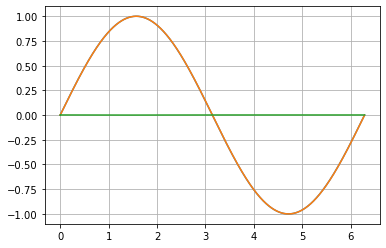

In [39]:
#Definimos nuestra malla
x=linspace(0,2*pi,5000)
y_integral = np.sin(x)
y_integral_numerica = funcion1(x,np.cos(x))
error=abs(y_integral- y_integral_numerica)
#Graficamos la integral del Coseno punto a punto, es decir el Seno evaluado en la malla
plot(x,np.sin(x))
#Graficamos la integral punto a punto del coseno con funcion1
plot(x,funcion1(x,np.cos(x)))
#s=m[:,1]
#m=funcion1(x,np.cos(x))
#print('{:^20}{:^20}'.format(r'x_i','Integral en x_i'))
#for i in range (len(m)):
    #print('{:^20}{:^20}'.format(x[i],m[i]))
plot(x,error,label='Error entre ambas gráficas')
print("El error entre ambas derivadas es",max(error))
grid()
show()

<span style="color:blue">2. En la página del curso, en la misma sección donde está este examen, hay un archivo que se llama ***$t\_acel.dat$***. Este es un archivo de texto que contiene datos de tiempos, $t_{i}$, y aceleración, $a_{i}$, acomodados dos columnas. Descargue el archivo en el mismo directorio donde está realizando su notebook. Para leer los datos del archivo en Python hay que usar:</span>

`from pylab import *
datos = loadtxt ('t_acel . dat')`


<span style="color:blue">en donde ***datos [:,0]*** se guardaràn los valores que corresponden al tiempo y en ***datos[:,1]*** se guardaràn los valores de la aceleraciòn. Para leer los datos del archivo si utiliza Julia hay que hacer lo siguiente:</span> 

`using DelimitedFiles
datos = readdlm("t_acel.dat",’ ’,Float64)`

<span style="color:blue">en donde ***datos[:,1]*** se guardaràn los valores que corresponden al tiempo y en ***datos[:,2]*** se guardaràn los valores de la aceleraciòn. Haga las siguientes actividades:</span>

<span style="color:blue">a) Haga la gràfica de los datos</span>

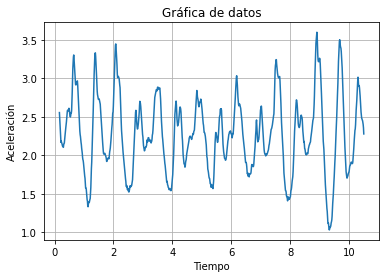

In [92]:
title("Gráfica de datos")
xlabel("Tiempo")
ylabel("Aceleración")
plot(t,a)
grid()
show()

<span style="color:blue">b) Calcule la derivada de cada punto utilizando algoritmos que desprecian tèrminos en $h^{3}$ y $h^{5}$. Compare las gráficas de cada uno de los algoritmos y proporcione el error máximo entre los algoritmos utilizados.</span>

*** Para calcular la derivada que desprecie los términos en $h^{3}$:***

La malla no es uniforme
0.0010000000000016662


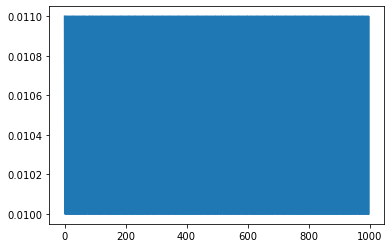

In [62]:
#Definimos un arreglo que llenaremos de la diferencia del tiempo entre dos puntos contiguos
malla=np.zeros(len(datos[:,0])-1)
tiempo=datos[:,0]
#Definimos un ciclo for para obtener las diferencia entre puntos
for i in range (len(datos[:,0])-1):
    malla[i]=tiempo[i+1]-tiempo[i]
#Obtenemos la diferencia entre el espacio más grande entre puntos y el más pequeño
a=max(malla)
b=min(malla)
if a == b:
    print("La malla es uniforme")
elif a < b:
    print("La malla no es uniforme")
elif a > b:
    print("La malla no es uniforme") 
print(a-b)
plot(malla)

Tenemos que la malla no es uniforme pero vemos que la diferencia entre el máximo y el mínimo es 0.0010000000000016662 casi cero y al gráficarlo vemos que parece uniforme por lo que usaremos algoritmos simetricos.

De acuerdo a las notas de la página del curso la derivada de segundo orden se puede calcular de la siguiente manera:

$$f'(x_{i}) \sim \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$$

Es decir: 
    $$f'_{i} \sim  \frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}$$

$$f'(x_{N})=-\frac{f_{N-1}-f_{N}}{x_{N-1}-x_{N}}$$


En los extremos se deben usar las relaciones:

$$f'(x_{0})=\frac{-0.5f_2+2f_1-1.5f_0}{x_1-x_0}$$

$$f'(x_0)=-\frac{-0.5f_2+2f_1-1.5f_0}{x_{N}-x_{N-1}}$$

Con esto estamos diciendo que nuestro conjunto de puntos tiene N+1 elementos.

In [67]:
#Algoritmo para calcular la derivada despreciando $h^{3}$
#Notebook 3
def deriv_h3(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    dosh = 2*h
    for i in range(1,len(f)-1):
        f_prima[i] = ( f[i+1]-f[i-1] )/(dosh)
    # calcular el primer punto
    f_prima[0] = ( -0.5*f[2] + 2*f[1] -1.5*f[0] )/h
    # calcular el ultimo punto
    f_prima[-1] = -( -0.5*f[-3] + 2*f[-2] -1.5*f[-1] )/h    
    return f_prima

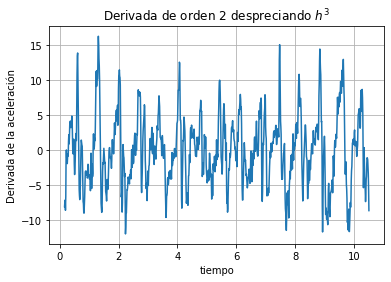

In [75]:
#Grafica de la derivada con f como aceleración y tiempo x
title("Derivada de orden 2 despreciando $h^3$")
xlabel("tiempo")
ylabel("Derivada de la aceleración")
#plot(datos[:,0],deriv_h3(datos[:,1],datos[:,0]))
plot(t,deriv_h3(a,t))
#t=datos[:,0]
grid()
show()

***Para calcular la derivada que desprecie los términos en $h^{5}$:***

Usando Notebook 3

En las notas de clase viene la forma de derivar una expresión de la derivada de $f(x)$ donde se desprecian términos de ordenm $h^{5}$ en adelnate. Esto implica tener que hacer operaciones con dos puntos a la izquierda y dos a la derecha para una expresión simétrica. Esta expresión es:
$$f'(x_{i})=\frac{1}{12h}(-f_{i+2}+8f_{i+1}-8f_{i-1}+f_{i-2})$$
Los puntos extremos se calculan de manera asimétricaa con la siguiente expresión:
$$f'(x_{i})=\frac{1}{h} \left(-\frac{25}{12}f_{i}+4f_{i+1}-3f_{i+2}+\frac{4}{3}f_{i+3}-\frac{1}{4}f_{i+4}\right)$$

In [69]:
def deriv_h5(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    doceh = 12*h
    for i in range(2,len(f)-2):
        f_prima[i] = ( -f[i+2]+ 8*(f[i+1]-f[i-1]) +f[i-2] )/(doceh)
    c0,c1,c2,c3,c4 = -25/12,4,-3,4/3,-0.25
    # calcular el primer punto
    f_prima[0] = ( c0*f[0] + c1*f[1] + c2*f[2] + c3*f[3] + c4*f[4] )/h
    # calcular el segundo punto
    f_prima[1] = ( c0*f[1] + c1*f[2] + c2*f[3] + c3*f[4] + c4*f[5] )/h
    # calcular el ultimo punto o el punto N
    f_prima[-1] = -( c0*f[-1] + c1*f[-2] + c2*f[-3] + c3*f[-4] + c4*f[-5] )/h
    # calcular el penultimo punto o el N-1
    f_prima[-2] = -( c0*f[-2] + c1*f[-3] + c2*f[-4] + c3*f[-5] + c4*f[-6] )/h
    return f_prima

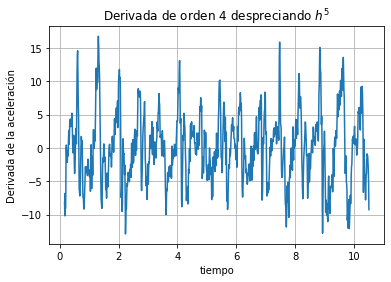

In [70]:
#Grafica de la derivada con f como aceleración y tiempo x
title("Derivada de orden 4 despreciando $h^5$")
xlabel("tiempo")
ylabel("Derivada de la aceleración")
plot(t,deriv_h5(datos[:,1],datos[:,0]))
#t=datos[:,0]
grid()
show()

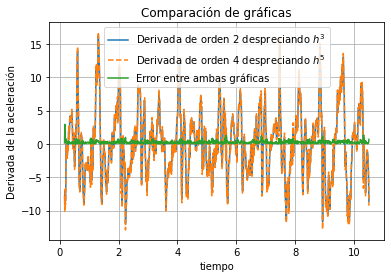

In [71]:
title("Comparación de gráficas")
xlabel("tiempo")
ylabel("Derivada de la aceleración")
y_h3 = deriv_h3(datos[:,1],datos[:,0])
y_h5 = deriv_h5(datos[:,1],datos[:,0])
error= abs(y_h3 - y_h5)
plot(t,deriv_h3(datos[:,1],datos[:,0]),label='Derivada de orden 2 despreciando $h^3$')
plot(t,deriv_h5(datos[:,1],datos[:,0]),'--',label='Derivada de orden 4 despreciando $h^5$')
plot(t,error,label='Error entre ambas gráficas')
#t=datos[:,0]
grid()
legend()
show()

El error entre ambas derivadas es 2.923913117495892


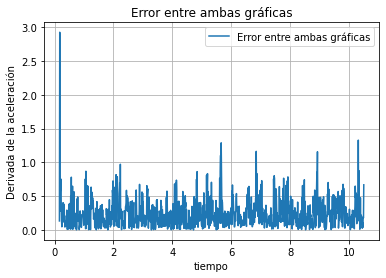

In [72]:
title("Error entre ambas gráficas")
xlabel("tiempo")
ylabel("Derivada de la aceleración")
plot(t,error,label='Error entre ambas gráficas')
print("El error entre ambas derivadas es",max(error))
grid()
legend()
show()

<span style="color:blue">c)Calcule la integral total de los datos con el algoritmo ***int_alg2*** que viene en el NB 6 de la pàgina del curso y compare el resultado utilizando el algoritmo de Boole. ¿Cuàl es la diferencia numèrica entre ambos algoritmos?</span>

In [89]:
#Algoritmo 2 Notebook 6 (Tarea 2)
#Se define la integral: 
def int_alg2(x,f):
    #Espacio entre dos puntos en la malla
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
     #Recordando las notas de pizzarrón "Integrales numéricas" tenemos que ocupar casos por si las N son par o nel : (N que ocupa las notas no es la misma
    # Si la malla sobre la que se va a integrar es par debe iniciar en el tercer elemento
    if mod(len(f),2) == 0:
        inicio = 2 
    #Si el número de puntos en la malla es impar debe iniciar en el segundo elemento
    elif mod(len(f),2) == 1: # Esta instruccion es opcional si se tienen varias decisiones "Mi segundo Notebook Python 2 II"
        inicio = 1
    #Pedimos  sume las particiones y que vaya de dos en dos.
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1] + 4*f[i] + f[i-1]
    integral = integral*(h/3)
    #En la frontera tenemos a la integral como: 
     # punto inicial si se tiene un arreglo par "Notebook 7"
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4]) #tal como está en "Notebook 6 y 7" jiji 
    return integral    

In [90]:
print('La integral con el algoritmo int_alg2 es:',int_alg2(t,a))

La integral con el algoritmo int_alg2 es: 22.718030099124945


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

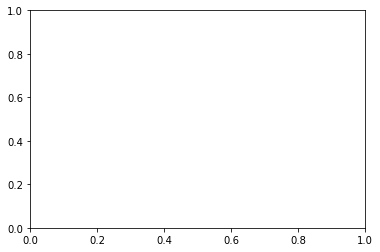

In [96]:
plot(t,int_alg2(t,a))
title("Velocidades Integral de los datos usando int_alg2")
xlabel("Tiempo")
ylabel('Velocidad')
#print('La integral es:',funcion1(a,t))
grid()
show()

In [77]:
#Copiamos el algoritmo de Boole del ejercicio 3 de la Tarea 2 
#(la neta sí lo tengo mal ya valió también este examen y voy a llorar :'v)
#Se define la integral: (muy parecido a la forma en que se hizo "int_Simpson")
def int_Boole(f,x):
#Espacio entre dos puntos en la malla     
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
   #Si la malla menos el primer punto es divisible entre cuatro (residuo=0) debe iniciar en el primer elemento "0"
    if mod(len(f)-1,4) == 0:
        inicio = 0
   #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=1) debe iniciar en el segundo elemento "1" 
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
   #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=2) debe iniciar en el tercer elemento "2"
    if mod(len(f)-1,4) == 2:
        inicio = 2
        
    #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=3) debe iniciar en el cuarto elemento "3"
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Pedimos sume las particiones y que vaya de cuatro en cuatro.
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]+32*f[i+1]+12*f[i+2]+32*f[i+3]+7*f[i+4]
    integral = integral*(2*h/45)
    
    #Consideramos los puntos frontera para sumarlos "los huequitos que sobran"
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]+3*f[i+1]+3*f[i+2]+f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0] + 4*f[1] + f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral


In [81]:
print('La integral con el algoritmo int_Boole es:',int_Boole(a,t))

La integral con el algoritmo int_Boole es: 22.717627967639356


In [82]:
#
#Obtenemos el valor de la integral:
Boole = int_Boole(a,t)
a2 = int_alg2(t,a)
diferencia = abs(Boole-a2) #valor absoluto
print('La diferencia númerica entre la integral con el algoritmo de int_Boole e int_alg2 es:', diferencia)

La diferencia númerica entre la integral con el algoritmo de int_Boole e int_alg2 es: 0.00040213148558976286


<span style="color:blue">d) Calcule la integral de los datos, es decir, un conjunto de puntos $\{t_{i},v_{i}\}$ tales que su derivada numèrica sean los puntos $\{t_{i},a_{i}\}$ proporcionados por el archivo.</span>

Se utiliza la función del ejercicio 1 porque justamente tenemos como como entrada los puntos $\{x_{i},f_{i}\}$, en este caso tenemos los puntos $\{t_{i},a_{i}\}$,  y que regrese $\{x_{i},F_{i}\}$, donde $F_{i}$ representa la integral de la función hasta el $x_{i}$-ésimo punto, en este caso serán los puntos $\{t_{i},v_{i}\}$.

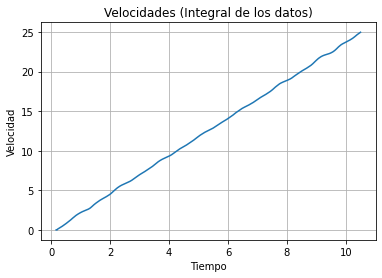

In [97]:
#Graficamos las velocidades
plot(datos[:,0],funcion1(t,a))
title("Velocidades (Integral de los datos)")
xlabel("Tiempo")
ylabel('Velocidad')
#print('La integral es:',funcion1(a,t))
grid()
show()

<span style="color:blue">3. Sabemos que $\int_{1}^{\infty}{\frac{dx}{x^{2}}}$, sin embargo numéricamente no es factible utilizar el infinito. De esta manera genere una forma de calcular dicha integral hasta obtener una precisión de $10^{−3}$. Explique su procedimiento de tal manera que pueda garantizar el resultado de dicha integral y cual sería su generalización.</span>